In [182]:
# 导包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. DataFrame 加载行、列数据

## 1.1 df加载列

In [5]:
# 1. 读取数据源,获取 df 对象
df = pd.read_csv("data/gapminder.tsv",sep="\t")
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [12]:
# 2.处理数据之前,需要看一下数据结构
df.shape   # 查看数据维度
df.size     # 查看数据元素的数量(行数*列数)
df.dtypes   # 查看数据类型
df.info()   # 数据源基本信息,(非空总条数),数据类型
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [13]:
##3. 加载指定的 1 列数据
df.country

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [14]:
# 4. 加载指定的多列数据
df[['country','year','gdpPercap']] # 里面的 [] 可以看做是 列名的列表

,country,year,gdpPercap
0,Afghanistan,1952,779.445314
1,Afghanistan,1957,820.853030
2,Afghanistan,1962,853.100710
3,Afghanistan,1967,836.197138
4,Afghanistan,1972,739.981106
...,...,...,...
1699,Zimbabwe,1987,706.157306
1700,Zimbabwe,1992,693.420786
1701,Zimbabwe,1997,792.449960
1702,Zimbabwe,2002,672.038623


## 1.2 df加载行

In [18]:
# 通过 行索引获取 指定的行
df.loc[0]     #根据 行索引 获取数据,行索引可以自定义默认是 0123
df.iloc[0]    #根据 行号 获取数据,行号相当于数组中的下标,不可自定义

df.tail(n=1)    # 获取最后一行信息
df.head(n=1)    # 获取第一行信息

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314


## 1.3 df加载指定行\列数据(重点示例)

In [34]:
# 1. loc方式,获取指定多行数据
df.loc[[0,1,2]]

# 2. iloc方式,获取指定多行数据
df.iloc[[0,1,2,3]]

# 3. 加载指定行的指定列
df.loc[[20,21,22],['country',"year"]]   # 行索引 + 列名
df.iloc[[20,21,22],[0,2,4]]             # 行号 + 列的编号

# 4. 上述的 行,列部分,不仅可以传入固定值,还可以通过 range() , 切片等方式实现
df.loc[:,['country']]                       # ： 代表所有    所有行，1列
df.loc[:,['country','continent']]           # 所有行，多列

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


## 2. 分组和聚合介绍

In [36]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [50]:
# 1. 分组统计格式: df.groupby('分组字段')['聚合操作字段'].具体的聚合函数名()
# 2. 分组统计格式: df.groupby(['分组字段1','分组字段2'])['聚合操作的字段1','聚合操作的字段2'].具体的聚合函数名()

# 2. 基于上述的格式,完成需求
# 需求1: 统计每一年预期寿命,平均人口,平均GDP
df.groupby('year')['lifeExp'].mean() # 平均寿命
df.groupby('year')['gdpPercap'].mean() # 平均GDP
df.groupby('year')['pop'].mean()    # 平均人口
# 合并写法
df.groupby(['year','continent'])[['lifeExp','gdpPercap','pop']].mean()

# 扩展,如果计算的是 多字段的 不同的聚合需求 可以用 agg函数实现
# 格式: agg({'列名':'聚合函数名','列名':'聚合函数名'})
df.groupby(['year','continent']).agg({'lifeExp':'mean','pop':'max'}) # 平均寿命 最大人口


lifeExp         pop
year continent                       
1952 Africa     39.135500    33119096
     Americas   53.279840   157553000
     Asia       46.314394   556263527
     Europe     64.408500    69145952
     Oceania    69.255000     8691212
1957 Africa     41.266346    37173340
     Americas   55.960280   171984000
     Asia       49.318544   637408000
     Europe     66.703067    71019069
     Oceania    70.295000     9712569
1962 Africa     43.319442    41871351
     Americas   58.398760   186538000
     Asia       51.563223   665770000
     Europe     68.539233    73739117
     Oceania    71.085000    10794968
1967 Africa     45.334538    47287752
     Americas   60.410920   198712000
     Asia       54.663640   754550000
     Europe     69.737600    76368453
     Oceania    71.310000    11872264
1972 Africa     47.450942    53740085
     Americas   62.394920   209896000
     Asia       57.319269   862030000
     Europe     70.775033    78717088
     Oceania    71.910000    13177000
1977 Africa     49.580423    62209173
     Americas   64.391560   220239000
     Asia       59.610556   943455000
     Europe     71.937767    78160773
     Oceania    72.855000    14074100
1982 Africa     51.592865    73039376
     Americas   66.228840   232187835
     Asia       62.617939  1000281000
     Europe     72.806400    78335266
     Oceania    74.290000    15184200
1987 Africa     53.344788    81551520
     Americas   68.090720   242803533
     Asia       64.851182  1084035000
     Europe     73.642167    77718298
     Oceania    75.320000    16257249
1992 Africa     53.629577    93364244
     Americas   69.568360   256894189
     Asia       66.537212  1164970000
     Europe     74.440100    80597764
     Oceania    76.945000    17481977
1997 Africa     53.598269   106207839
     Americas   71.150480   272911760
     Asia       68.020515  1230075000
     Europe     75.505167    82011073
     Oceania    78.190000    18565243
2002 Africa     53.325231   119901274
     Americas   72.422040   287675526
     Asia       69.233879  1280400000
     Europe     76.700600    82350671
     Oceania    79.740000    19546792
2007 Africa     54.806038   135031164
     Americas   73.608120   301139947
     Asia       70.728485  1318683096
     Europe     77.648600    82400996
     Oceania    80.719500    20434176

In [51]:
# 需求3: 每个达州,列出了多少国家和地区
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

## 3. DataFrame 基本绘画

<Axes: xlabel='year'>

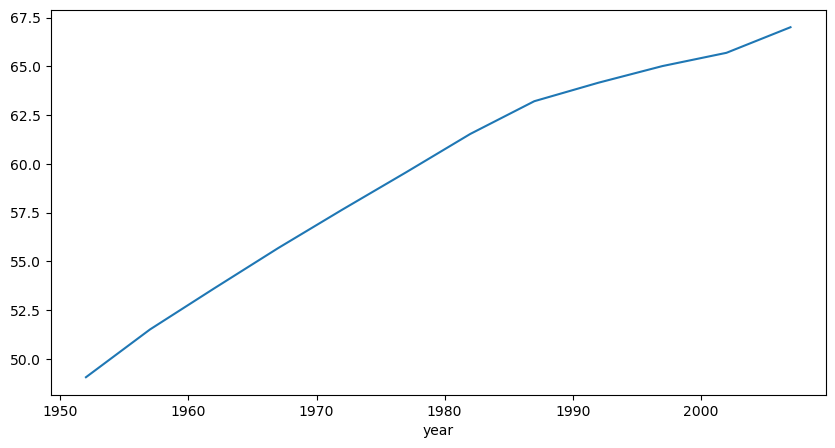

In [54]:
# 把上述的每年，平均寿命 结果绘制成图形
df.groupby('year')['lifeExp'].mean().plot(figsize=(10,5))

year
1952    Axes(0.125,0.11;0.775x0.77)
1957    Axes(0.125,0.11;0.775x0.77)
1962    Axes(0.125,0.11;0.775x0.77)
1967    Axes(0.125,0.11;0.775x0.77)
1972    Axes(0.125,0.11;0.775x0.77)
1977    Axes(0.125,0.11;0.775x0.77)
1982    Axes(0.125,0.11;0.775x0.77)
1987    Axes(0.125,0.11;0.775x0.77)
1992    Axes(0.125,0.11;0.775x0.77)
1997    Axes(0.125,0.11;0.775x0.77)
2002    Axes(0.125,0.11;0.775x0.77)
2007    Axes(0.125,0.11;0.775x0.77)
Name: lifeExp, dtype: object

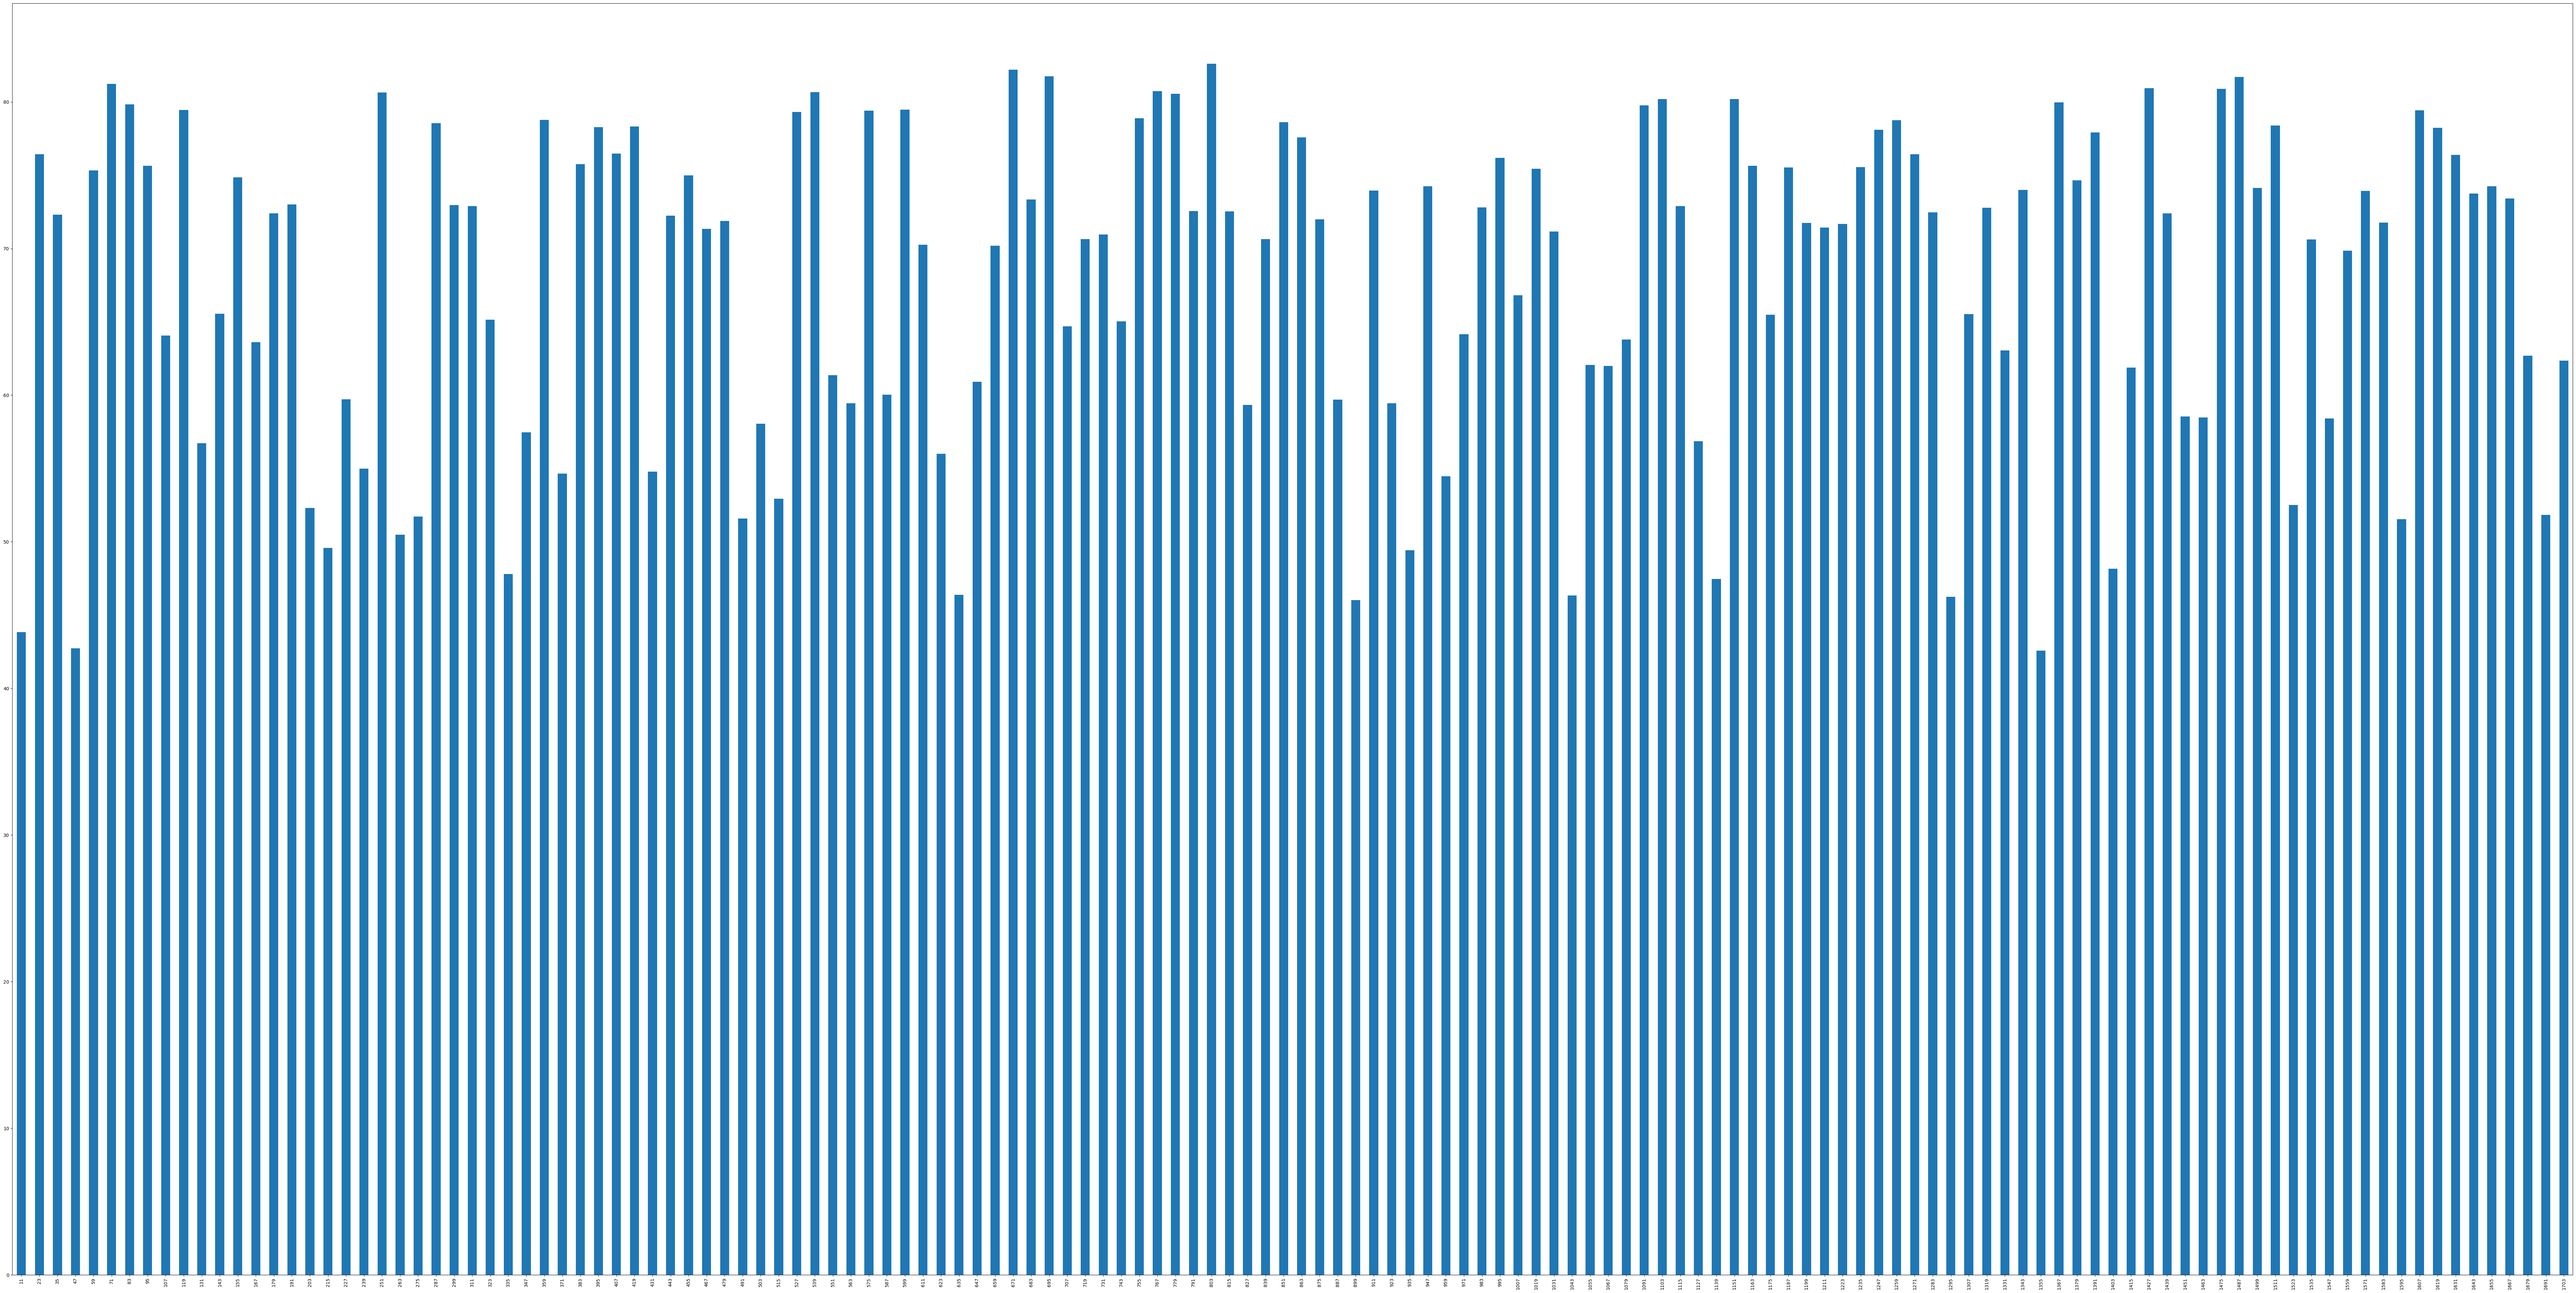

In [59]:
df.groupby('year')['lifeExp'].plot(kind='bar',figsize=(100,50))

# 4. dataFrame对象 常用的统计值的方法

In [61]:
# 1. 加载数据源,获取到 df 对象
movie = pd.read_csv('data/movie.csv')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [68]:
# 2. 演示常用的 统计值的方式
movie.shape             # 行列
movie.dtypes            # 每列的数据类型
movie.info()            # 每列信息基本信息
movie.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4897 non-null   object 
 1   director_name              4814 non-null   object 
 2   num_critic_for_reviews     4867 non-null   float64
 3   duration                   4901 non-null   float64
 4   director_facebook_likes    4814 non-null   float64
 5   actor_3_facebook_likes     4893 non-null   float64
 6   actor_2_name               4903 non-null   object 
 7   actor_1_facebook_likes     4909 non-null   float64
 8   gross                      4054 non-null   float64
 9   genres                     4916 non-null   object 
 10  actor_1_name               4909 non-null   object 
 11  movie_title                4916 non-null   object 
 12  num_voted_users            4916 non-null   int64  
 13  cast_total_facebook_likes  4916 non-null   int64

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4867.000000,4901.000000,4814.000000,4893.000000,4909.000000,4.054000e+03,4.916000e+03,4916.000000,4903.000000,4895.000000,4.432000e+03,4810.000000,4903.000000,4916.000000,4590.000000,4916.000000
mean,137.988905,107.090798,691.014541,631.276313,6494.488491,4.764451e+07,8.264492e+04,9579.815907,1.377320,267.668846,3.654749e+07,2002.447609,1621.923516,6.437429,2.222349,7348.294142
std,120.239379,25.286015,2832.954125,1625.874802,15106.986884,6.737255e+07,1.383222e+05,18164.316990,2.023826,372.934839,1.002427e+08,12.453977,4011.299523,1.127802,1.402940,19206.016458
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,49.000000,93.000000,7.000000,132.000000,607.000000,5.019656e+06,8.361750e+03,1394.750000,0.000000,64.000000,6.000000e+06,1999.000000,277.000000,5.800000,1.850000,0.000000
50%,108.000000,103.000000,48.000000,366.000000,982.000000,2.504396e+07,3.313250e+04,3049.000000,1.000000,153.000000,1.985000e+07,2005.000000,593.000000,6.600000,2.350000,159.000000
75%,191.000000,118.000000,189.750000,633.000000,11000.000000,6.110841e+07,9.377275e+04,13616.750000,2.000000,320.500000,4.300000e+07,2011.000000,912.000000,7.200000,2.350000,2000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,4.200000e+09,2016.000000,137000.000000,9.500000,16.000000,349000.000000


# 5. DataFarm对象,常见的排序方式


In [88]:
# 1. 查看数据源
movie

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [76]:
# 2. 完成如下的需求
# nlargest(n,'列名')      基于某列,找出最大的n个
# nsmallest(n,'别名')     基于某列,找出最小的n个

# 需求1: 找到小成本,高口碑的电影
# step1: 找到该需求中,涉及到的列
movie2 = movie[['movie_title','budget','imdb_score']]
movie2.head()

# 找到评分最高的 100 部电影
movie2.nlargest(100,'imdb_score')

# 基于上一步找到 预算最小的10 个电影
movie2.nlargest(100,'imdb_score').nsmallest(10,'budget')

,movie_title,budget,imdb_score
4804,Butterfly Girl,180000.0,8.7
4801,Children of Heaven,180000.0,8.5
4706,12 Angry Men,350000.0,8.9
4550,A Separation,500000.0,8.4
4636,The Other Dream Team,500000.0,8.4
2215,Psycho,806947.0,8.5
4425,Casablanca,950000.0,8.6
4397,"The Good, the Bad and the Ugly",1200000.0,8.9
4395,Reservoir Dogs,1200000.0,8.4
4369,Queen of the Mountains,1400000.0,8.7


In [78]:
# 需求2:找到每年 imdb_score 评分最高的电影
# 1. 从原始数据中,找到要的几列数据
movie3 = movie[['movie_title','title_year','imdb_score']]
movie3.head()

,movie_title,title_year,imdb_score
0,Avatar,2009.0,7.9
1,Pirates of the Caribbean: At World's End,2007.0,7.1
2,Spectre,2015.0,6.8
3,The Dark Knight Rises,2012.0,8.5
4,Star Wars: Episode VII - The Force Awakens,NaN,7.1


In [93]:
# movie3.groupby(['title_year'])[['imdb_score','movie_title']].max() # 按照分组的方式实现

# 按照 年 , 评分 降序排列方式实现
movie3.sort_values(['title_year','imdb_score'],ascending=False)
# 基于上述的数据,只获取每年的 第1条
# 参数解释 subset 表示子集,即参考某列的进行删除,进行(去重)删除
movie3.sort_values(['title_year','imdb_score'],ascending=False).drop_duplicates(subset='title_year')

,movie_title,title_year,imdb_score
4312,Kickboxer: Vengeance,2016.0,9.1
3745,Running Forever,2015.0,8.6
4369,Queen of the Mountains,2014.0,8.7
3935,"Batman: The Dark Knight Returns, Part 2",2013.0,8.4
3,The Dark Knight Rises,2012.0,8.5
...,...,...,...
2694,Metropolis,1927.0,8.3
4767,The Big Parade,1925.0,8.3
4833,Over the Hill to the Poorhouse,1920.0,4.8
4695,Intolerance: Love's Struggle Throughout the Ages,1916.0,8.0


# 6. 综合案例-链家数据分析

In [94]:
# 加载数据
df = pd.read_csv('data/LJdata.csv')
df

,区域,地址,标题,户型,面积,价格,楼层,建造时间,朝向,更新时间,看房人数,备注,链接地址
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,朝青租房,天鹅湾北区,天鹅湾北区 1室1厅 9500元,1室1厅,50,9500,中楼层(共8层),2010年建板塔结合,南,2017.07.27,13,距离6号线青年路站736米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101697995.html
2756,太阳宫租房,水星园,水星园精装一居室 可自带家具家电 业主也可配齐,1室1厅,68,9500,中楼层(共23层),2005年建板塔结合,北,2017.07.24,14,距离10号线太阳宫站432米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101698013.html
2757,六里桥租房,莲花小区,莲花小区 西南两居室 温馨舒适 楼层合适,2室1厅,84,7200,低楼层(共28层),1999年建板塔结合,西南,2017.07.26,7,距离10号线莲花桥站661米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101702130.html
2758,陶然亭租房,中海紫御公馆,中海紫御公馆 把您的家安放在花园里,2室2厅,91,12000,中楼层(共22层),2010年建板塔结合,南,2017.07.26,6,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101703605.html


In [118]:
df.columns = ['district', 'address', 'title', 'house_type', 'area', 'price', 'floor', 'build_time', 'direction', 'update_time', 'view_num','extra_info','link']
df

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,朝青租房,天鹅湾北区,天鹅湾北区 1室1厅 9500元,1室1厅,50,9500,中楼层(共8层),2010年建板塔结合,南,2017.07.27,13,距离6号线青年路站736米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101697995.html
2756,太阳宫租房,水星园,水星园精装一居室 可自带家具家电 业主也可配齐,1室1厅,68,9500,中楼层(共23层),2005年建板塔结合,北,2017.07.24,14,距离10号线太阳宫站432米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101698013.html
2757,六里桥租房,莲花小区,莲花小区 西南两居室 温馨舒适 楼层合适,2室1厅,84,7200,低楼层(共28层),1999年建板塔结合,西南,2017.07.26,7,距离10号线莲花桥站661米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101702130.html
2758,陶然亭租房,中海紫御公馆,中海紫御公馆 把您的家安放在花园里,2室2厅,91,12000,中楼层(共22层),2010年建板塔结合,南,2017.07.26,6,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101703605.html


In [117]:
# 3. 查看数据类型
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   district     2760 non-null   object
 1   address      2760 non-null   object
 2   title        2760 non-null   object
 3   house_type   2760 non-null   object
 4   area         2760 non-null   int64 
 5   price        2760 non-null   int64 
 6   floor        2760 non-null   object
 7   build_time   2758 non-null   object
 8   direction    2760 non-null   object
 9   update_time  2760 non-null   object
 10  view_num     2760 non-null   int64 
 11  extra_info   2760 non-null   object
 12  link         2760 non-null   object
dtypes: int64(3), object(10)
memory usage: 280.4+ KB


,area,price,view_num
count,2760.000000,2760.000000,2760.000000
mean,87.658696,7570.800725,13.448913
std,41.862928,6316.204986,12.746202
min,19.000000,1300.000000,0.000000
25%,58.000000,4500.000000,4.000000
50%,80.000000,6000.000000,10.000000
75%,103.000000,8500.000000,19.000000
max,720.000000,210000.000000,122.000000


In [238]:
# 4. 完成如下需求
#需求1:找到租金最低,租金最高的房子
df.sort_values(by=['price']).head(1)
df.sort_values(by=['price'],ascending=False).head(1)

#需求2: 找到最近新上的十套房源
df.sort_values(['update_time'],ascending=False).head(10)

#需求3: 查看所有更新时间,细节:去重
df['update_time'].unique()

#需求4: 看房人数,进阶版需求: 不同看房人数的房源数量
tmp_df = df.groupby('view_num',as_index=False)['district'].count()
tmp_df.columns = ['看房人数','房源数量']
tmp_df


#需求5: 把上述的 count , 即: 不同看房人数的 房源数量,绘制成图形
# tmp_df['房源数量'].plot(kind="bar",figsize=(30,10))

#需求6: 房租价格的分布
df['price'].mean()


#需求7: 看房人数最多的朝向
# df['view_num'].max()
# df[df.view_num==df['view_num'].max()]['direction']
tmp_df = df.groupby("direction",as_index=False)['view_num'].sum()
tmp_df[tmp_df['view_num']==tmp_df['view_num'].max()]



#需求8: 房型分布情况,绘图
# df.groupby('house_type',as_index=False)['district'].count()
# df.groupby('house_type')['district'].count().plot(kind='bar',figsize=(20,10))

#需求9: 最受欢迎的房型
temp_df = df.groupby('house_type',as_index=False)['view_num'].sum()
temp_df[temp_df.view_num==temp_df['view_num'].max()]

#需求10: 房子的平均租房价格
df['price_per_m2'] = df['price'] / df['area']
df
df['price_per_m2'].mean()


#需求11: 热门小区,看房人数最多的小区
temp_df = df.groupby('address',as_index=False)['view_num'].sum()
# temp_df[temp_df.view_num==temp_df['view_num'].max()]
# temp_df.sort_values('view_num',ascending=False)

# 方法二:
temp_df.nlargest(10,"view_num")

#需求12: 出租房源最多的小区(计算出租房源的总数量)
tmp_df = df.groupby('address',as_index=False).district.count()
tmp_df.columns = ['address','count']
# 方式一
# tmp_df[tmp_df['count'] == tmp_df['count'].max()]

#方式二
tmp_df.nlargest(len(temp_df),'count')




,address,count
1288,远洋山水,19
938,润枫水尚,10
516,天畅园,9
541,太阳公元,9
481,大方居,9
...,...,...
634,左右坊,1
636,左安漪园,1
637,左家庄东里,1
638,左家庄西街,1
